In [1]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
filedir='/global/cfs/cdirs/dune/users/brussell/2x2/detector_properties/dqdx/coverage/data/flow_v4/'
title_dict={0:'X (Drift)',1:'Y (Vertical)',2:'Z (Beam)'}

In [10]:
xres_frac, xmiss_frac, xtheta, xphi, xtrack_length, xext_type, xext_iog = [{} for i in range(7)]
yres_frac, ymiss_frac, ytheta, yphi, ytrack_length, yext_type, yext_iog = [{} for i in range(7)]
zres_frac, zmiss_frac, ztheta, zphi, ztrack_length, zext_type, zext_iog = [{} for i in range(7)]

for j in range(1,9,1): 
    xres_frac[j]=[]; xmiss_frac[j]=[]; xtheta[j]=[]; xphi[j]=[]; xtrack_length[j]=[]; xext_type[j]=[]; xext_iog[j]=[]
    yres_frac[j]=[]; ymiss_frac[j]=[]; ytheta[j]=[]; yphi[j]=[]; ytrack_length[j]=[]; yext_type[j]=[]; yext_iog[j]=[]
    zres_frac[j]=[]; zmiss_frac[j]=[]; ztheta[j]=[]; zphi[j]=[]; ztrack_length[j]=[]; zext_type[j]=[]; zext_iog[j]=[]
    
for filename in glob.glob(filedir+'*.json'):
    with open(filename, 'r') as json_file: d = json.load(json_file)   
    # out[orientation][str(tpc_id)][str(event_id)]=[residual_fraction, miss_frac, theta, phi, track_length, ext_type, ext_iog]
    for orientation in d.keys():
        for tpc_id_str in d[orientation].keys():
            for event_id_str in d[orientation][tpc_id_str].keys():
                if orientation=='x':
                    xres_frac[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][0])
                    xmiss_frac[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][1])
                    xtheta[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][2])
                    xphi[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][3]*-1)
                    xtrack_length[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][4])
                    xext_type[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][5])
                    xext_iog[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][6])
                if orientation=='y':
                    yres_frac[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][0])
                    ymiss_frac[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][1])
                    ytheta[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][2])
                    yphi[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][3]*-1)
                    ytrack_length[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][4])
                    yext_type[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][5])
                    yext_iog[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][6])
                if orientation=='z':
                    zres_frac[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][0])
                    zmiss_frac[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][1])
                    ztheta[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][2])
                    zphi[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][3]*-1)
                    ztrack_length[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][4])
                    zext_type[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][5])
                    zext_iog[int(tpc_id_str)].append(d[orientation][tpc_id_str][event_id_str][6])

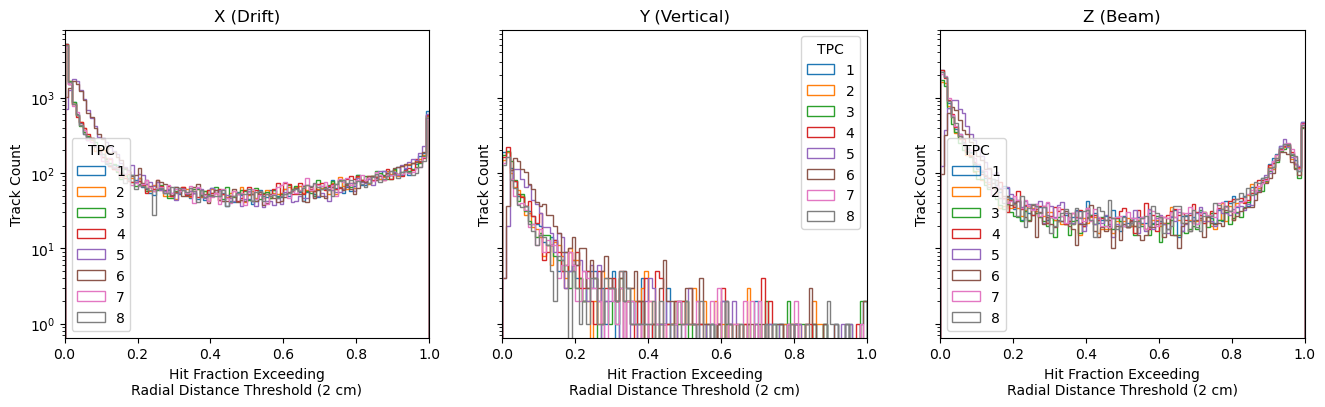

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey=True)
bins=np.linspace(0,1,101)
for i in range(1,9,1): 
    ax[0].hist(xres_frac[i], bins=bins, histtype='step', label=str(i))
    ax[1].hist(yres_frac[i], bins=bins, histtype='step', label=str(i))
    ax[2].hist(zres_frac[i], bins=bins, histtype='step', label=str(i))
for i in range(3):
    ax[i].set_ylabel('Track Count')
    ax[i].set_xlabel('Hit Fraction Exceeding'+'\n'+'Radial Distance Threshold (2 cm)')
    ax[i].legend(title='TPC')
    ax[i].set_yscale('log')
    ax[i].set_title(title_dict[i])
    ax[i].set_xlim(0,1)

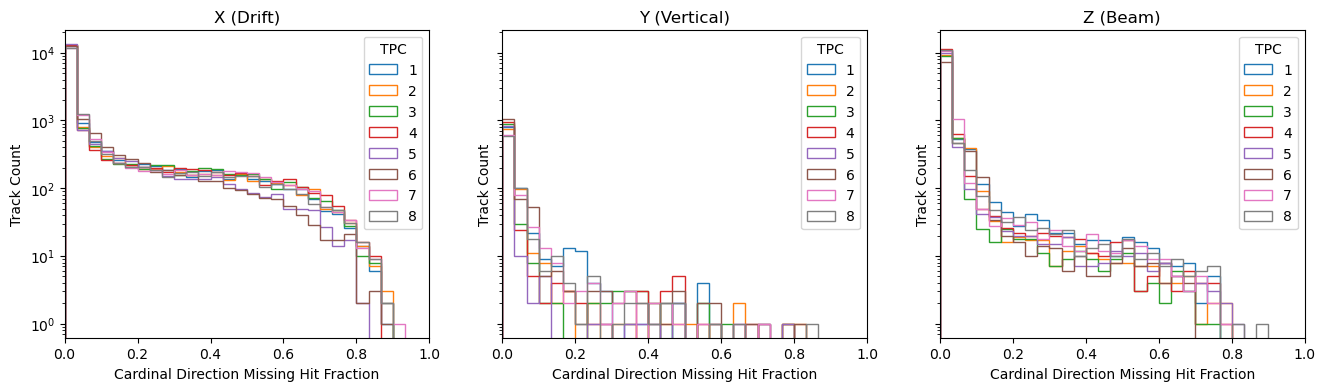

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey=True)
bins=np.linspace(0,1,31)
for i in range(1,9,1): 
    ax[0].hist(xmiss_frac[i], bins=bins, histtype='step', label=str(i))
    ax[1].hist(ymiss_frac[i], bins=bins, histtype='step', label=str(i))
    ax[2].hist(zmiss_frac[i], bins=bins, histtype='step', label=str(i))
for i in range(3):
    ax[i].set_ylabel('Track Count')
    ax[i].set_xlabel('Cardinal Direction Missing Hit Fraction')
    ax[i].legend(title='TPC')
    ax[i].set_yscale('log')
    ax[i].set_title(title_dict[i])
    ax[i].set_xlim(0,1)

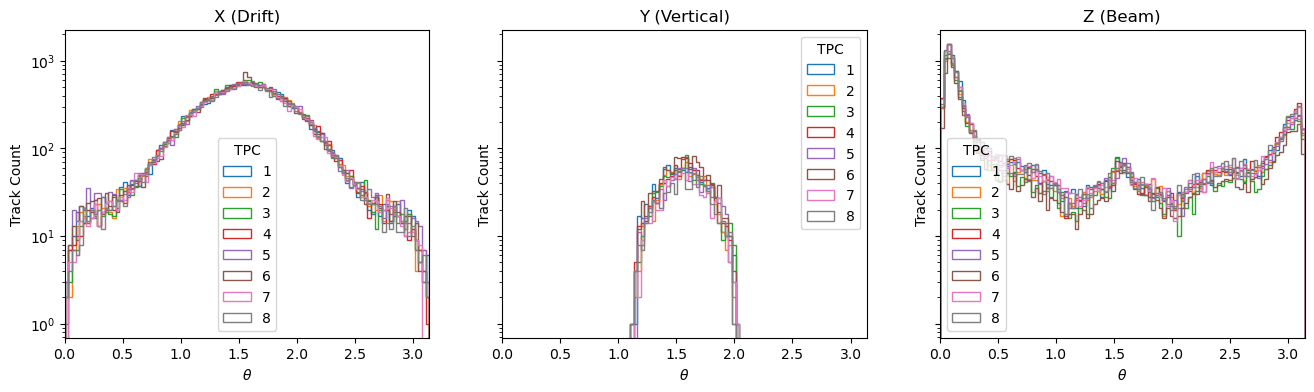

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey=True)
bins=np.linspace(0,np.pi,101)
for i in range(1,9,1): 
    ax[0].hist(xtheta[i], bins=bins, histtype='step', label=str(i))
    ax[1].hist(ytheta[i], bins=bins, histtype='step', label=str(i))
    ax[2].hist(ztheta[i], bins=bins, histtype='step', label=str(i))
for i in range(3):
    ax[i].set_ylabel('Track Count')
    ax[i].set_xlabel(r'$\theta$')
    ax[i].legend(title='TPC')
    ax[i].set_yscale('log')
    ax[i].set_title(title_dict[i])
    ax[i].set_xlim(0,np.pi)

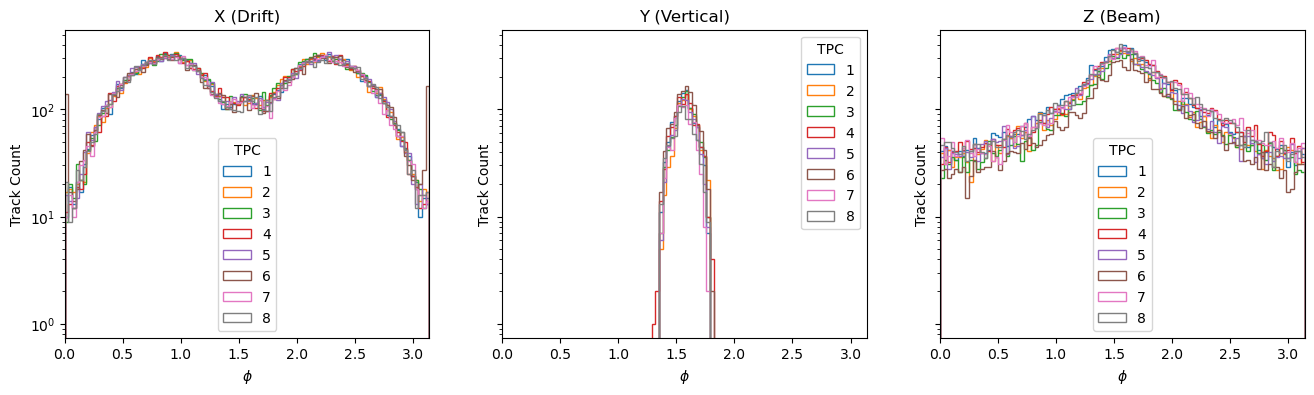

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey=True)
bins=np.linspace(0,np.pi,101)
for i in range(1,9,1): 
    ax[0].hist(xphi[i], bins=bins, histtype='step', label=str(i))
    ax[1].hist(yphi[i], bins=bins, histtype='step', label=str(i))
    ax[2].hist(zphi[i], bins=bins, histtype='step', label=str(i))
for i in range(3):
    ax[i].set_ylabel('Track Count')
    ax[i].set_xlabel(r'$\phi$')
    ax[i].legend(title='TPC')
    ax[i].set_yscale('log')
    ax[i].set_title(title_dict[i])
    ax[i].set_xlim(0, np.pi)

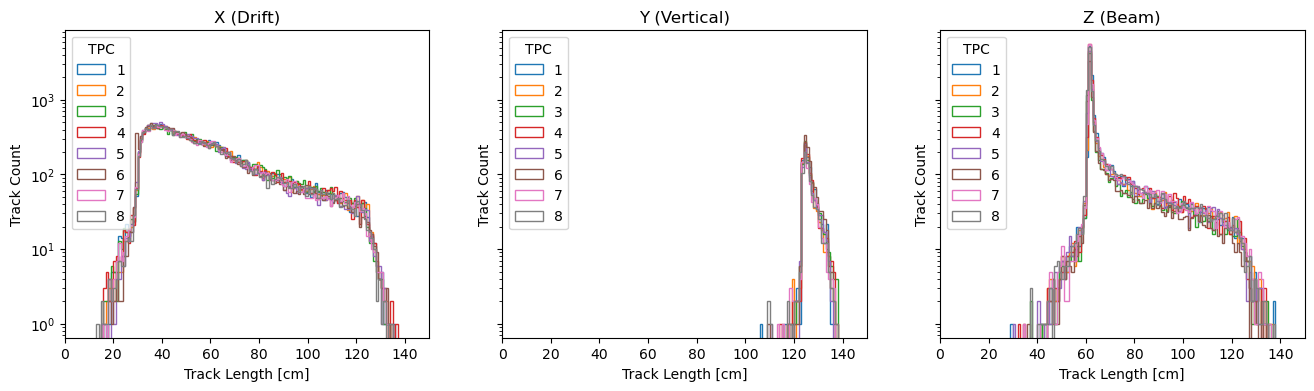

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey=True)
bins=np.linspace(0,150,151)
for i in range(1,9,1): 
    ax[0].hist(xtrack_length[i], bins=bins, histtype='step', label=str(i))
    ax[1].hist(ytrack_length[i], bins=bins, histtype='step', label=str(i))
    ax[2].hist(ztrack_length[i], bins=bins, histtype='step', label=str(i))
for i in range(3):
    ax[i].set_ylabel('Track Count')
    ax[i].set_xlabel('Track Length [cm]')
    ax[i].legend(title='TPC')
    ax[i].set_yscale('log')
    ax[i].set_title(title_dict[i])
    ax[i].set_xlim(0,140)

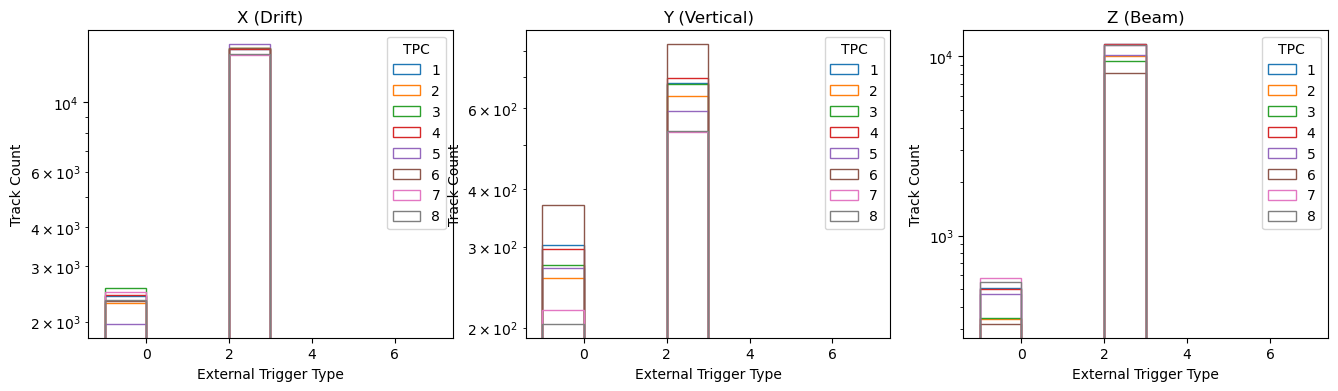

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey=True)
bins=np.linspace(-1,7,9)
for i in range(1,9,1): 
    ax[0].hist(xext_type[i], bins=bins, histtype='step', label=str(i))
    ax[1].hist(yext_type[i], bins=bins, histtype='step', label=str(i))
    ax[2].hist(zext_type[i], bins=bins, histtype='step', label=str(i))
for i in range(3):
    ax[i].set_ylabel('Track Count')
    ax[i].set_xlabel('External Trigger Type')
    ax[i].legend(title='TPC')
    ax[i].set_yscale('log')
    ax[i].set_title(title_dict[i])

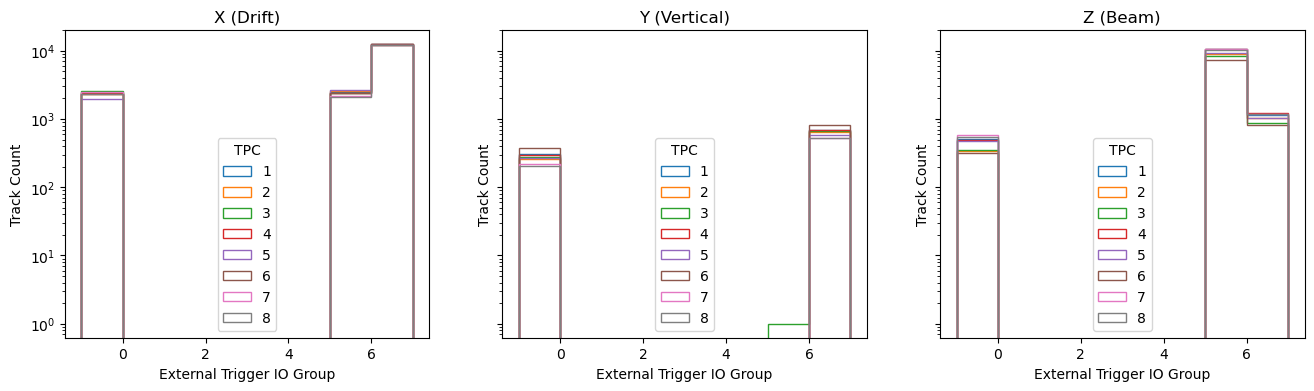

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4), sharey=True)
bins=np.linspace(-1,7,9)
for i in range(1,9,1): 
    ax[0].hist(xext_iog[i], bins=bins, histtype='step', label=str(i))
    ax[1].hist(yext_iog[i], bins=bins, histtype='step', label=str(i))
    ax[2].hist(zext_iog[i], bins=bins, histtype='step', label=str(i))
for i in range(3):
    ax[i].set_ylabel('Track Count')
    ax[i].set_xlabel('External Trigger IO Group')
    ax[i].legend(title='TPC')
    ax[i].set_yscale('log')
    ax[i].set_title(title_dict[i])